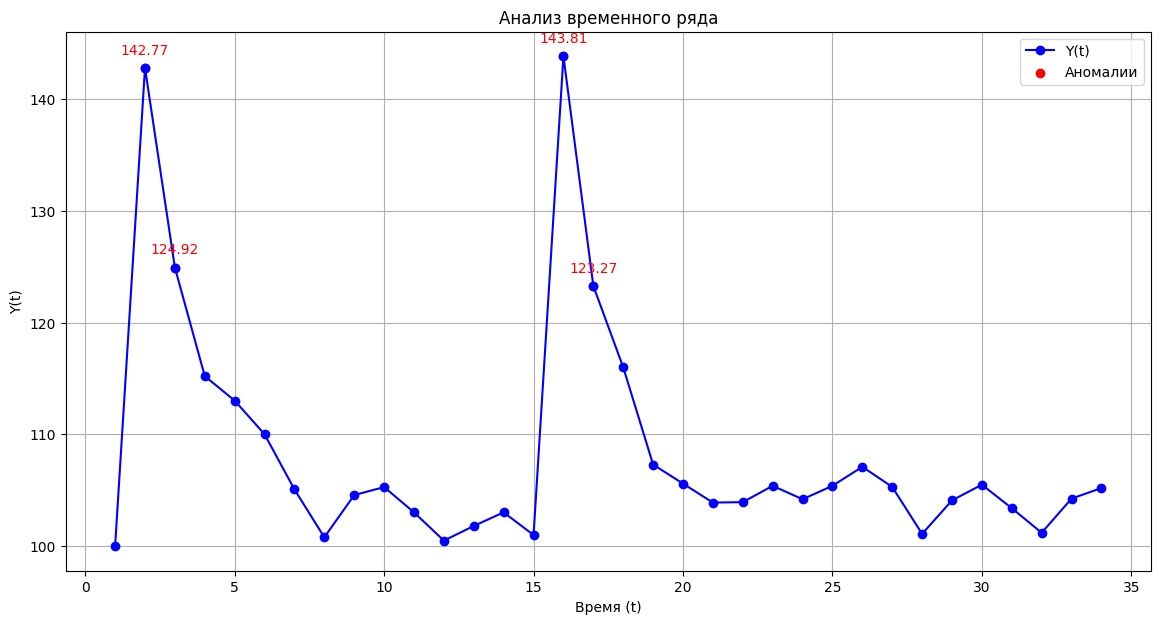

     t    Y(t)  Y(t) - Yср        λt  Anomaly
0    1  100.00   -8.441765       NaN    False
1    2  142.77   34.328235  4.028489     True
2    3  124.92   16.478235  1.681284     True
3    4  115.21    6.768235  0.914581    False
4    5  113.02    4.578235  0.206275    False
5    6  110.01    1.568235  0.283511    False
6    7  105.08   -3.361765  0.464355    False
7    8  100.80   -7.641765  0.403131    False
8    9  104.57   -3.871765  0.355095    False
9   10  105.29   -3.151765  0.067817    False
10  11  103.03   -5.411765  0.212868    False
11  12  100.50   -7.941765  0.238300    False
12  13  101.81   -6.631765  0.123388    False
13  14  103.03   -5.411765  0.114911    False
14  15  101.00   -7.441765  0.191205    False
15  16  143.81   35.368235  4.032256     True
16  17  123.27   14.828235  1.934654     True
17  18  116.00    7.558235  0.684758    False
18  19  107.30   -1.141765  0.819449    False
19  20  105.60   -2.841765  0.160122    False
20  21  103.90   -4.541765  0.1601

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Определение данных временного ряда
data = { 
    "t": list(range(1, 35)), # Временной индекс t
    "Y(t)": [100, 142.77, 124.92, 115.21, 113.02, 110.01, 105.08, 100.8, 104.57, 105.29, 103.03, 100.5,
             101.81, 103.03, 101, 143.81, 123.27, 116, 107.3, 105.6, 103.9, 103.94, 105.4, 104.2,
             105.4, 107.1, 105.3, 101.1, 104.1, 105.5, 103.4, 101.2, 104.26, 105.2]
}

# Создание DataFrame
df = pd.DataFrame(data)

mean_y = df['Y(t)'].mean()
std_dev = df['Y(t)'].std(ddof=1)  # Using Bessel's correction with ddof=1

# Adding a new column to DataFrame for the difference between each observation and the mean (Y(t) - Yср)
df['Y(t) - Yср'] = df['Y(t)'] - mean_y

# Calculate λt for t=2,3,...n (as t=1 does not have a previous value)
df['λt'] = df['Y(t)'].diff().abs() / std_dev

lambda_alpha_30 = 1.2
lambda_alpha_50 = 1.1
lambda_alpha = lambda_alpha_30 - ((30 - 34) / (50 - 30)) * (lambda_alpha_30 - lambda_alpha_50)



df['λt'] = df['Y(t)'].diff().abs() / std_dev

df['Anomaly'] = df['λt'] > lambda_alpha


# Построение графика с указанием аномалий и значений этих аномалий

plt.figure(figsize=(14, 7))
# Отрисовка основной линии временного ряда
plt.plot(df['t'], df['Y(t)'], marker='o', linestyle='-', color='blue', label='Y(t)')

# Выделение аномалий
for index, row in df[df['Anomaly']].iterrows():
    plt.annotate(f"{row['Y(t)']}", # Текст аннотации - значение Y(t)
                 (row['t'], row['Y(t)']), # Координаты точки, которую аннотируем
                 textcoords="offset points", # Как интерпретировать координаты
                 xytext=(0,10), # Смещение метки аннотации
                 ha='center', # Горизонтальное выравнивание текста
                 color='red') # Цвет текста

# Обозначение аномалий красными точками
plt.scatter(df[df['Anomaly']]['t'], df[df['Anomaly']]['Y(t)'], color='red', label='Аномалии')

# Добавление заголовка и подписей осей
plt.title('Анализ временного ряда')
plt.xlabel('Время (t)')
plt.ylabel('Y(t)')
plt.grid(True)
plt.legend()

# Отображение графика с аномалиями
plt.show()

sum_squared_diff = ((df['Y(t)'] - mean_y)**2).sum()
variance_y = sum_squared_diff / (df['t'].count() - 1)
std_dev_y = np.sqrt(variance_y)


print(df)
print(mean_y, std_dev, std_dev_y)